# LECTURE 2 - DEEP LEARNING & OPTIMIZATION
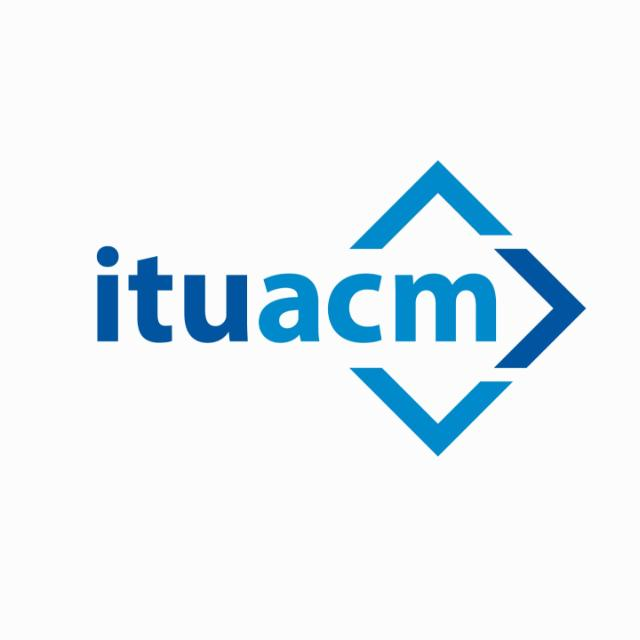

# 1. What is Deep Learning?

Deep Learning is a branch of artificial intelligence inspired by the structure and function of the human brain's neural networks. It is designed to process vast amounts of data and solve complex problems, often considered a subset of machine learning.

---

## Why is Deep Learning Important?

1. **Handles Large-Scale Data:**  
   Deep learning algorithms are capable of working with massive datasets and learning complex patterns within them.

2. **Automated Feature Extraction:**  
   Unlike traditional machine learning, where feature extraction often requires manual effort, deep learning models automatically learn the most relevant features.

3. **Superior Performance:**  
   Deep learning excels in tasks like image recognition, natural language processing, and speech recognition.

---

## How Does Deep Learning Work?

Deep learning uses **artificial neural networks** (ANNs), which are computational systems inspired by the human brain. These networks consist of layers of interconnected nodes (neurons) that process and transform data.

### Neural Network Architecture:

1. **Input Layer:**  
   Receives raw data (e.g., images, text, or sound).

2. **Hidden Layers:**  
   Process the data using weighted connections and activation functions to extract meaningful patterns. Deep learning gets its name from having multiple hidden layers.

3. **Output Layer:**  
   Produces the final result (e.g., classification, prediction).

### Example Neural Network Diagram:

```plaintext
Input Layer  -->  Hidden Layer 1  -->  Hidden Layer 2  -->  Output Layer


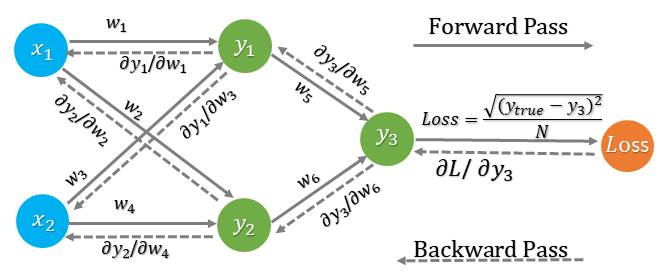

Epoch 1/50


C:\Users\tolgakilinckaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6089 - loss: 0.6078 - val_accuracy: 0.7950 - val_loss: 0.5608
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8015 - loss: 0.5348 - val_accuracy: 0.8000 - val_loss: 0.5147
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8068 - loss: 0.4960 - val_accuracy: 0.8050 - val_loss: 0.4768
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8029 - loss: 0.4697 - val_accuracy: 0.8350 - val_loss: 0.4440
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8398 - loss: 0.4184 - val_accuracy: 0.8600 - val_loss: 0.4131
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8316 - loss: 0.4028 - val_accuracy: 0.8500 - val_loss: 0.3852
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8320 - loss: 0.3710 - val_accuracy: 0.8550 - val_loss: 0.3608
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8567 - loss: 0.3427 - val_accuracy: 0.8500 - val_loss: 0.3427
Epo

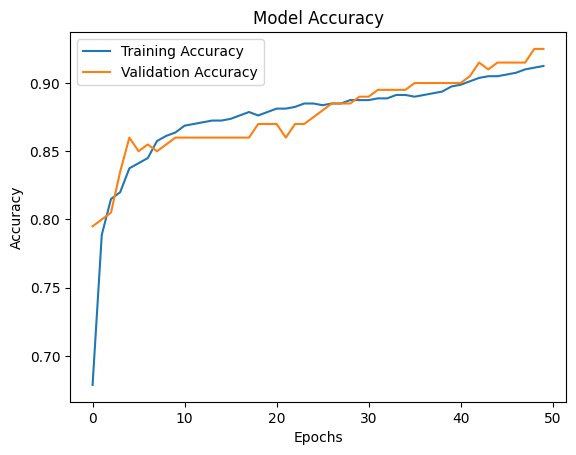

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic data (2 classes, non-linear separable)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 2. Loss Functions

In this notebook, we will explore two essential loss functions commonly used in machine learning:  
1. **Mean Squared Error (MSE)** - Typically used for regression problems.  
2. **Binary Cross-Entropy** - Frequently used for binary classification tasks.

Loss functions are crucial for measuring how well a model's predictions match the actual values. The computed loss guides the model's learning process during training.

---

## Mean Squared Err**Definition:**  
Mean Squared Error (MSE) measures the average squared difference between the actual and predicted values.  

The mathematical formula is:  

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}}^{(i)} - y_{\text{pred}}^{(i)})^2
$$

Where:  
- $( y_{\text{true}}) $: Actual values  
- $( y_{\text{pred}}) $: Predicted values  
- $( n )$: Number of data points  mber of data points  

---

**Code Example**


In [1]:
# Mean Squared Error (MSE) Calculation
import numpy as np

def mean_squared_error(y_true, y_pred):
    """
    Function to calculate Mean Squared Error.
    y_true: Actual values
    y_pred: Predicted values
    """
    return np.mean((y_true - y_pred) ** 2)

# Example Data
y_true = np.array([1, 0, 1, 1, 0])  # Actual values
y_pred_mse = np.array([0.9, 0.2, 0.8, 0.6, 0.1])  # Predicted values

# Calculate MSE
mse_loss = mean_squared_error(y_true, y_pred_mse)
print("Mean Squared Error (MSE):", mse_loss)


Mean Squared Error (MSE): 0.052000000000000005


---

## Binary Cross-Entropy Loss

**Definition:**  
Binary Cross-Entropy is a loss function commonly used in binary classification problems. It measures the difference between actual values and predicted probabilities.  

The mathematical formula is:  

$$
L = -\frac{1}{n} \sum_{i=1}^{n} \left( y_{true}^{(i)} \log(y_{pred}^{(i)}) + (1 - y_{true}^{(i)}) \log(1 - y_{pred}^{(i)}) \right)
$$

Where:  
- $y_{true}$ : Actual values (0 or 1)  
- $y_{pred}$: Predicted probabilities (between 0 and 1)  
- $n$: Number of data points  

---

**Code Example**


In [3]:
# Binary Cross-Entropy Loss Calculation
def binary_cross_entropy(y_true, y_pred):
    """
    Function to calculate Binary Cross-Entropy Loss.
    y_true: Actual values (0 or 1)
    y_pred: Predicted probabilities (between 0 and 1)
    """
    epsilon = 1e-15  # To prevent log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip probabilities
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Example Data
y_pred_ce = np.array([0.8, 0.3, 0.7, 0.9, 0.4])  # Predicted probabilities

# Calculate Binary Cross-Entropy Loss
ce_loss = binary_cross_entropy(y_true, y_pred_ce)
print("Binary Cross-Entropy Loss:", ce_loss)


Binary Cross-Entropy Loss: 0.31053591572309835


---

## Visualization of Loss Functions

Finally, let’s visualize how the loss functions behave with varying predictions. This helps us understand how sensitive each function is to errors.
plt.grid()
plt.show()


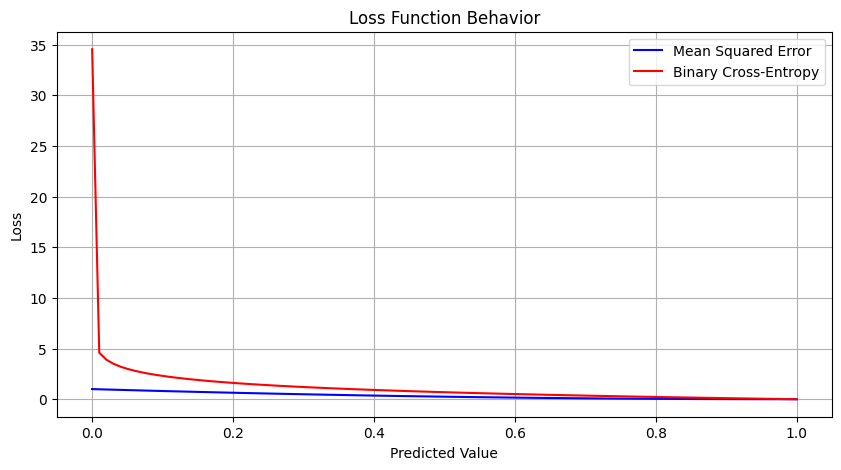

In [4]:
# Visualization of Loss Functions
import matplotlib.pyplot as plt

# Generate example data
y_true_single = 1  # Single true value
y_pred_range = np.linspace(0, 1, 100)  # Range of predicted probabilities

# Calculate losses
mse_values = (y_true_single - y_pred_range) ** 2
ce_values = -(
    y_true_single * np.log(np.clip(y_pred_range, 1e-15, 1 - 1e-15))
    + (1 - y_true_single) * np.log(1 - np.clip(y_pred_range, 1e-15, 1 - 1e-15))
)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_pred_range, mse_values, label="Mean Squared Error", color="blue")
plt.plot(y_pred_range, ce_values, label="Binary Cross-Entropy", color="red")
plt.title("Loss Function Behavior")
plt.xlabel("Predicted Value")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


---

## Summary

- **Mean Squared Error** is ideal for regression problems where we measure the squared difference between predictions and actual values.  
- **Binary Cross-Entropy** is suited for binary classification tasks, focusing on the difference between predicted probabilities and true labels.  

Both loss functions serve as guides to adjust the model parameters and improve predictions during training.


# 3. Gradient Descent

In this notebook, we will learn about **Gradient Descent**, a fundamental optimization algorithm used to train machine learning models.  

Gradient Descent is the backbone of many learning algorithms, enabling them to find the best parameters by minimizing a loss function.

---

## What is Gradient Descent?

**Definition:**  
Gradient Descent is an iterative optimization algorithm that adjusts model parameters (e.g., weights and biases) to minimize a given loss function.  

### Key Idea:
1. **Gradient:** It is the slope or derivative of the loss function with respect to the parameters.  
2. **Descent:** Move in the opposite direction of the gradient to reduce the loss.  

### Update Rule:
For a parameter $(\theta)$, the update rule is:  

$$
\theta = \theta - \eta \frac{\partial J}{\partial \theta}
$$

Where:  
- $(\theta)$: The parameter to be updated (e.g., weight, bias)  
- $(\eta)$: Learning rate, controls the step size  
- $(J)$: The loss function  
- $(\frac{\partial J}{\partial \theta})$: Gradient of $(J)$ with respect to $(\theta)$  

---

## Gradient Descent in Action

Let’s use a simple quadratic loss function as an example:  

$$
J(\theta) = (\theta - 3)^2
$$

The goal is to find the value of $(\theta)$ that minimizes $(J(\theta))$.  
We will iteratively update $(\theta)$ using Gradient Descent.

---

**Code Example: Gradient Descent on a Quadratic Function**


Optimal theta: 2.9654123548617948
Minimum loss: 0.0011963051962064115


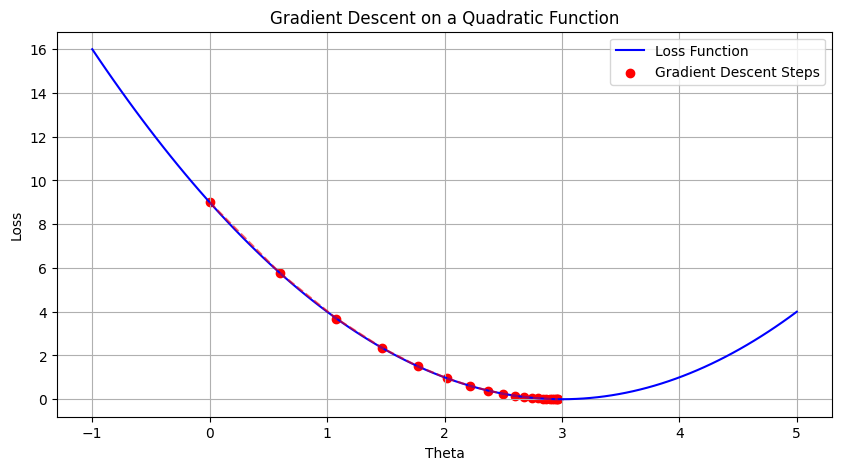

In [6]:
# Gradient Descent Example: Quadratic Function

import numpy as np
import matplotlib.pyplot as plt

# Define the loss function and its derivative
def loss_function(theta):
    return (theta - 3) ** 2

def gradient(theta):
    return 2 * (theta - 3)

# Gradient Descent Parameters
theta = 0  # Initial value of theta
learning_rate = 0.1
iterations = 20

# For tracking the optimization process
theta_values = [theta]
loss_values = [loss_function(theta)]

# Gradient Descent Loop
for _ in range(iterations):
    theta -= learning_rate * gradient(theta)  # Update rule
    theta_values.append(theta)
    loss_values.append(loss_function(theta))

# Display Results
print("Optimal theta:", theta)
print("Minimum loss:", loss_function(theta))

# Plot the optimization process
plt.figure(figsize=(10, 5))
x = np.linspace(-1, 5, 100)
y = loss_function(x)

plt.plot(x, y, label="Loss Function", color="blue")
plt.scatter(theta_values, loss_values, color="red", label="Gradient Descent Steps")
plt.plot(theta_values, loss_values, linestyle="--", color="red", alpha=0.6)
plt.title("Gradient Descent on a Quadratic Function")
plt.xlabel("Theta")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


---

## Learning Rate and Its Impact

The **learning rate $(\eta)$** determines the step size in each iteration. A well-chosen learning rate is crucial for Gradient Descent:  

- **Too Small:** Converges very slowly.  
- **Too Large:** May overshoot the minimum or even diverge.  

Let’s visualize the effect of different learning rates.

---

**Code Example: Learning Rate Impact**


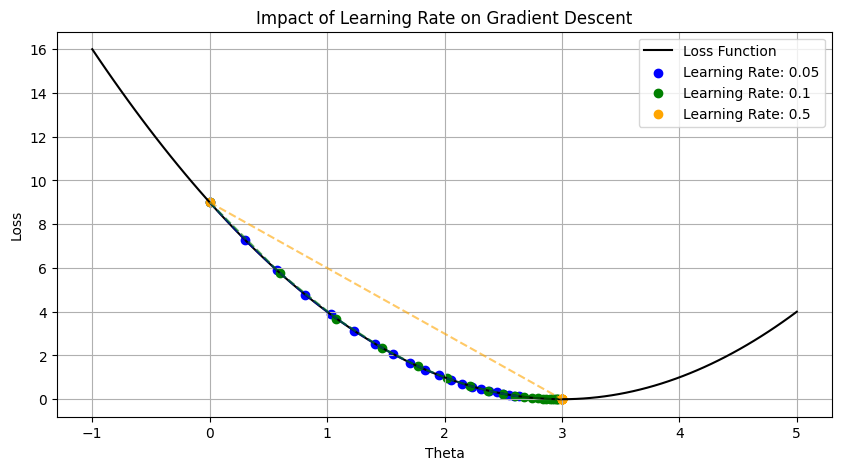

In [7]:
# Learning Rate Impact on Gradient Descent

learning_rates = [0.05, 0.1, 0.5]
colors = ['blue', 'green', 'orange']

plt.figure(figsize=(10, 5))
x = np.linspace(-1, 5, 100)
y = loss_function(x)
plt.plot(x, y, label="Loss Function", color="black")

# Perform Gradient Descent for different learning rates
for lr, color in zip(learning_rates, colors):
    theta = 0
    theta_values = [theta]
    for _ in range(iterations):
        theta -= lr * gradient(theta)
        theta_values.append(theta)

    loss_values = [loss_function(t) for t in theta_values]
    plt.scatter(theta_values, loss_values, label=f"Learning Rate: {lr}", color=color)
    plt.plot(theta_values, loss_values, linestyle="--", color=color, alpha=0.6)

plt.title("Impact of Learning Rate on Gradient Descent")
plt.xlabel("Theta")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


---

## Variants of Gradient Descent

### 1. **Batch Gradient Descent:**  
Uses the entire dataset to compute the gradient.  
- Advantage: Precise updates.  
- Disadvantage: Computationally expensive for large datasets.  

### 2. **Stochastic Gradient Descent (SGD):**  
Uses one data point at a time to compute the gradient.  
- Advantage: Faster updates.  
- Disadvantage: Updates are noisy, may not converge smoothly.

### 3. **Mini-Batch Gradient Descent:**  
Uses a subset of data (mini-batch) to compute the gradient.  
- Balances the trade-offs of batch and stochastic methods.

---

## Summary

- Gradient Descent is a fundamental algorithm for optimizing loss functions.  
- It iteratively updates parameters in the direction of the negative gradient.  
- Choosing the right **learning rate** is crucial for effective optimization.  
- Variants like Batch, Stochastic, and Mini-Batch Gradient Descent cater to different scenarios.

---

You can now try experimenting with different learning rates, loss functions, or initialization values to gain a deeper understanding of Gradient Descent.


# 4. Activation Functions (Aktivasyon Fonksiyonları)

Activation functions are an essential part of neural networks. They determine the output of a neuron given an input or a weighted sum of inputs. Without activation functions, neural networks would behave like simple linear models, limiting their ability to solve complex problems.

---

## Why Are Activation Functions Important?

1. **Non-linearity:** Activation functions introduce non-linearity to the network, enabling it to learn and model complex data patterns.  
2. **Output Scaling:** They help scale the outputs to a desired range, such as between 0 and 1 or -1 and 1.  
3. **Gradient Flow:** They affect the flow of gradients during backpropagation, impacting learning speed and convergence.

---

## Common Activation Functions

Here are some widely used activation functions:  

1. **Sigmoid**  
2. **ReLU (Rectified Linear Unit)**  
3. **Tanh (Hyp  
4. **Leaky ReLU**

---

### 1. Sigm**Definition:**  
The Sigmoid function squashes the input values to a range between 0 and 1.  

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

**Characteristics:**  
- Output Range: $(0, 1)$  
- Commonly used in the output layer of binary classification odels.  
 in the output layer of binary class

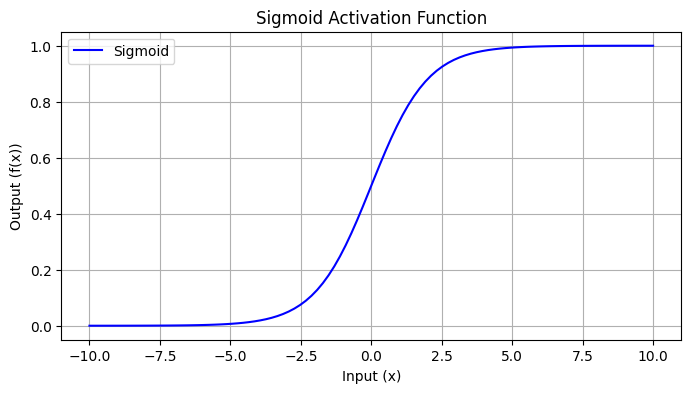

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Visualization
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Sigmoid", color="blue")
plt.title("Sigmoid Activation Function")
plt.xlabel("Input (x)")
plt.ylabel("Output (f(x))")
plt.grid()
plt.legend()
plt.show()


---

### 2. ReLU (Rectified Linear Unit)

**Definition:**  
ReLU outputs the input if it is positive; otherwise, it returns zero.

$$
f(x) = 
\begin{cases} 
x & \text{if } x > 0 \\ 
0 & \text{if } x \leq 0 
\end{cases}
$$

**Characteristics:**  
- Output Range: $ [0, \infty) $  
- Efficient and widely used in hidden layers of deep networks.

**Code Example:**


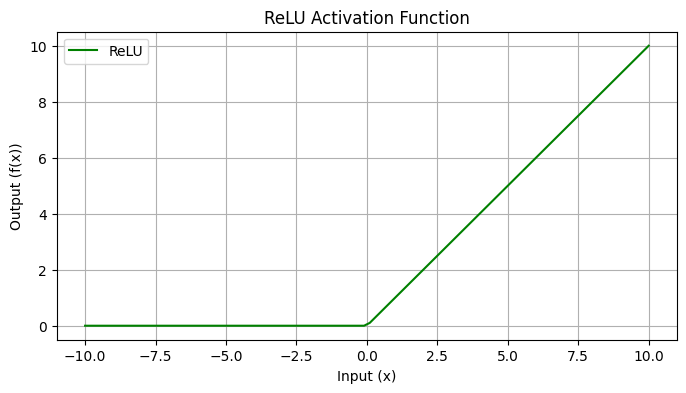

In [11]:
# ReLU Function
def relu(x):
    return np.maximum(0, x)

# Visualization
y = relu(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label="ReLU", color="green")
plt.title("ReLU Activation Function")
plt.xlabel("Input (x)")
plt.ylabel("Output (f(x))")
plt.grid()
plt.legend()
plt.show()


---

### 3. Tanh (Hyperbolic Tangent)

**Definition:**  
The Tanh function scales the input to a range between -1 and 1.

$$
f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

**Characteristics:**  
- Output Range: $(-1, 1)$  
- Zero-centered, making it useful for symm**Code ric dat:**
**Example:**  
*de Example:**


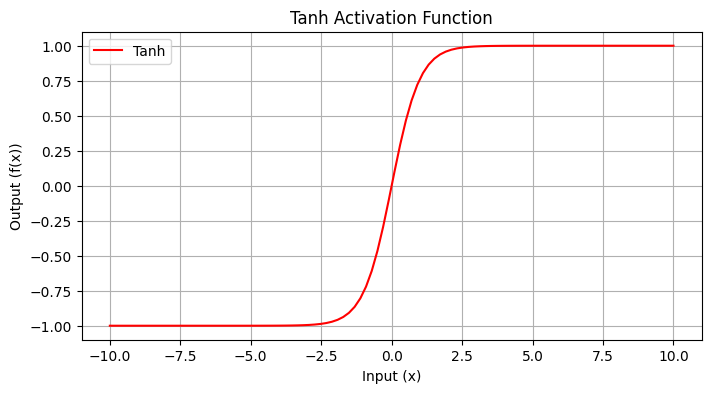

In [12]:
# Tanh Function
def tanh(x):
    return np.tanh(x)

# Visualization
y = tanh(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Tanh", color="red")
plt.title("Tanh Activation Function")
plt.xlabel("Input (x)")
plt.ylabel("Output (f(x))")
plt.grid()
plt.legend()
plt.show()


# 5. Backpropagation (Geri Yayılım)

Backpropagation is an essential algorithm used in training neural networks. It is the process of updating the weights of the network by propagating the error backward through the layers, allowing the model to learn from the mistakes made in the forward pass.

---

## What is Backpropagation?

**Definition:**  
Backpropagation is a supervised learning algorithm that calculates the gradient of the loss function with respect to each weight in the network by using the chain rule. This gradient is then used to update the weights and minimize the loss.

### Key Steps in Backpropagation:
1. **Forward Pass:** Compute the output of the network by passing the input data through the layers.
2. **Compute Loss:** Calculate the error or loss between the predicted output and the actual target.
3. **Backward Pass (Backpropagation):** Propagate the error backward through the network to compute gradients.
4. **Update Weights:** Adjust the weights of the network based on the computed gradients using an optimization algorithm (e.g., Gradient Descent).

---

## Mathematical Explanation

Given a neural network with an output layer $ y_{\text{pred}} $ and actual target $ y_{\text{true}} $, the loss function $ L $ is:

$$
L = \frac{1}{2}(y_{\text{true}} - y_{\text{pred}})^2
$$

Now, the backpropagation algorithm updates the weights of the network using the gradient of the loss function with respect to each weight.

### Chain Rule:
The chain rule is used to calculate the gradient of the loss with respect to each weight:

$$
\frac{\partial L}{\partial w} = \frac{\partial L}{\partial y_{\text{pred}}} \cdot \frac{\partial y_{\text{pred}}}{\partial w}
$$

Where:
- $ w $ is the weight being updated.
- $ \frac{\partial L}{\partial y_{\text{pred}}} $is the error at the output layer.
- $ \frac{\partial y_{\text{pred}}}{\partial w} $is the gradient of the output with respect to the weight.

The weights are then updated using Gradient Descent:

$$
w := w - \eta \frac{\partial L}{\partial w}
$$

Where $ \eta $ is the learning rate.

---

## Code Example: Simple Backpropagation with One Hidden Layer

Let’s create a simple neural network with one hidden layer and implement backpropagation manually.

We’ll use the following components:
1. **Sigmoid Activation Function** for the hidden layer.
2. **Mean Squared Error (MSE)** for the loss function.
3. **Gradient Descent** for updating the weights.



In [15]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Mean Squared Error (MSE) loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Neural Network Parameters
input_layer_size = 2
hidden_layer_size = 2
output_layer_size = 1

# Initialize weights
np.random.seed(42)
W1 = np.random.randn(input_layer_size, hidden_layer_size)
b1 = np.zeros((1, hidden_layer_size))
W2 = np.random.randn(hidden_layer_size, output_layer_size)
b2 = np.zeros((1, output_layer_size))

# Sample input and target output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR problem
y = np.array([[0], [1], [1], [0]])

# Training parameters
learning_rate = 0.1
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward Pass
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_pred = sigmoid(Z2)
    
    # Compute the loss
    loss = mse_loss(y, y_pred)
    
    # Backpropagation
    # Output layer error
    dZ2 = y_pred - y
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]
    
    # Hidden layer error
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]
    
    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    # Print the loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} Loss: {loss:.4f}")

# Final predictions after training
print("\nFinal predictions after training:")
print(y_pred)


Epoch 0 Loss: 0.2558
Epoch 1000 Loss: 0.2494
Epoch 2000 Loss: 0.2454
Epoch 3000 Loss: 0.2021
Epoch 4000 Loss: 0.1466
Epoch 5000 Loss: 0.1346
Epoch 6000 Loss: 0.1309
Epoch 7000 Loss: 0.1292
Epoch 8000 Loss: 0.1283
Epoch 9000 Loss: 0.1277

Final predictions after training:
[[0.01247619]
 [0.49508491]
 [0.98903096]
 [0.50370478]]


---

## Explanation of the Code

1. **Forward Pass:**  
   - We calculate the activations for each layer using the input data and the current weights.
   
2. **Loss Calculation:**  
   - We compute the Mean Squared Error (MSE) between the predicted output and the true values.

3. **Backpropagation:**  
   - For each layer, we compute the gradients of the loss with respect to the weights using the chain rule.
   - The gradients are then used to update the weights through gradient descent.

4. **Weight Updates:**  
   - We update the weights of the network based on the computed gradients and learning rate.

---

## Summary

- **Backpropagation** is an essential algorithm for training neural networks by adjusting weights based on the computed error.
- It works by propagating the error backward through the layers, using the **chain rule** to compute gradients.
- **Gradient Descent** is used to minimize the loss function by updating the weights iteratively.
- Backpropagation allows neural networks to learn from their mistakes and improve over time.

---

By understanding and implementing backpropagation, you can train your own neural networks to solve complex problems.


# 6. Evaluation (Değerlendirme)

After training a machine learning model, it's essential to evaluate its performance to ensure that it generalizes well to new, unseen data. In this section, we’ll cover the different evaluation metrics and how to assess the performance of a model.

---

## Why is Evaluation Important?

1. **Performance Metrics:** Evaluation helps in understanding how well your model is performing.  
2. **Model Selection:** It allows you to compare different models and choose the best one.  
3. **Overfitting vs. Underfitting:** Evaluation helps to detect if the model is overfitting (too complex) or underfitting (too simple).

---

## Common Evaluation Metrics

### 1. Accuracy

**Definition:**  
Accuracy is the ratio of correctly predicted instances to the total instances. It is suitable for balanced datasets.

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

**Use Case:**  
Accuracy is commonly used for classification tasks when the classes are balanced.

---

### 2. Precision, Recall, and F1-Score

These metrics are often used for imbalanced datasets and classification problems.

**Precision:**  
Precision measures how many of the predicted positive instances were actually positive.

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

**Recall:**  
Recall measures how many of the actual positive instances were predicted as positive.

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

**F1-Score:**  
F1-Score is the harmonic mean of precision and recall.

$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

These metrics are particularly useful when dealing with imbalanced datasets.

---

### 3. Confusion Matrix

**Definition:**  
A confusion matrix provides a detailed breakdown of the model’s predictions. It is particularly helpful in classification tasks.

$$
\begin{matrix}
 & \text{Predicted Negative} & \text{Predicted Positive} \\
\text{Actual Negative} & \text{TN} & \text{FP} \\
\text{Actual Positive} & \text{FN} & \text{TP} \\
\end{matrix}
$$

Where:  
- **TN**: True Negatives  
- **FP**: False Positives  
- **FN**: False Negatives  
- **TP**: True Positives  

---

### 4. ROC Curve and AUC (Area Under Curve)

**Definition:**  
The ROC curve is a graphical representation of the true positive rate vs. the false positive rate at various threshold values. AUC is the area under this curve and represents the ability of the model to distinguish between classes.

**AUC Interpretation:**  
- AUC = 1: Perfect model.  
- AUC = 0.5: Model performs no better than random guessing.  
- AUC < 0.5: Model is worse than random guessing.

---

## Code Example: Model Evaluation with Classification Metrics

We will use a simple classification example using **Logistic Regression** and evaluate it using accuracy, precision, recall, F1-score, confusion matrix, and ROC curve.
nd evaluate it using accuracy, precision, recall, F1-score, confusion matrix, and ROC curve.



Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Confusion Matrix:
 [[0 0]
 [1 0]]


C:\Users\tolgakilinckaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tolgakilinckaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


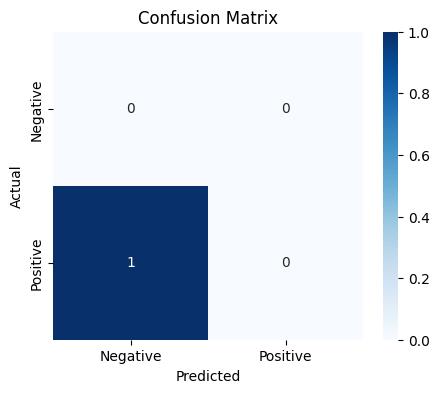

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: Simple binary classification (XOR problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Display Results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
